In [46]:
import requests
import json
import pandas as pd
import numpy as np
from config import bls_api_key
import matplotlib.pyplot as plt
import scipy.stats as st 
import matplotlib.patches as mpatches
from sklearn import datasets



In [47]:
url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"
headers = {"content-type": "application/json"}

target_series = ["LNS14000000","LNS14000000","LNS14000001","LNS14000002","LNS14000003","LNS14000006",
                 "LNS14032183","LNS14000009", ]

parameters = json.dumps({"seriesid": target_series,
             "startyear": "2006",
             "endyear": "2018",
             "registrationkey": bls_api_key})

p = requests.post(url, data=parameters, headers=headers)

json_data = json.loads(p.text)

json_data

{'status': 'REQUEST_SUCCEEDED',
 'responseTime': 572,
 'message': [],
 'Results': {'series': [{'seriesID': 'LNS14000000',
    'data': [{'year': '2018',
      'period': 'M12',
      'periodName': 'December',
      'value': '3.9',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M11',
      'periodName': 'November',
      'value': '3.7',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M10',
      'periodName': 'October',
      'value': '3.8',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M09',
      'periodName': 'September',
      'value': '3.7',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M08',
      'periodName': 'August',
      'value': '3.8',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M07',
      'periodName': 'July',
      'value': '3.8',
      'footnotes': [{}]},
     {'year': '2018',
      'period': 'M06',
      'periodName': 'June',
      'value': '4.0',
      'footnotes': [{}]},
     

In [48]:
years = []
months = []

for data_point in np.arange(len(json_data["Results"]["series"][0]["data"])):
        years.append(json_data["Results"]["series"][0]["data"][data_point]["year"])
        months.append(json_data["Results"]["series"][0]["data"][data_point]["periodName"])

In [49]:
unemployment_agedf = pd.DataFrame({"years": years,
                           "months": months,
                           "LNS14000000":"", 
                           "LNS14000000":"", 
                           "LNS14000001":"", 
                           "LNS14000002":"", 
                           "LNS14000003":"", 
                           "LNS14000006":"", 
                           "LNS14032183":"", 
                           "LNS14000009":"",
                                             })
unemployment_agedf.head()

,years,months,LNS14000000,LNS14000001,LNS14000002,LNS14000003,LNS14000006,LNS14032183,LNS14000009
0,2018,December,,,,,,,
1,2018,November,,,,,,,
2,2018,October,,,,,,,
3,2018,September,,,,,,,
4,2018,August,,,,,,,


In [50]:
for series in np.arange(len(json_data["Results"]["series"])):
    for data_point in np.arange(len(json_data["Results"]["series"][series]["data"])):
        unemployment_agedf.loc[data_point, json_data["Results"]["series"][series]["seriesID"]] = json_data["Results"]["series"][series]["data"][data_point]["value"]

In [55]:

for column in unemployment_agedf.columns[3:]:
    unemployment_agedf[f"{column}"] = unemployment_agedf[f"{column}"].astype(float)



unemployment_agedf.rename(columns={"LNS14000000":"Unemployment, 16yo and over",
                           "LNS14000001": "Unemployment, Men 16yo and over",
                           "LNS14000002": "Unemployment, Women 16yo and over",
                           "LNS14000003": "Unemployment, White people 16yo and over",
                           "LNS14000006": "Unemployment, African Americans 16yo and over",
                           "LNS14032183": "Unemployment, Asian people 16yo and over",
                           "LNS14000009": "Unemployment, Hispanic people 16yo and over"},
                                              inplace=True)
unemployment_agedf.reset_index(drop=True, inplace=True)

#unemployment_agedf.sort_values(by="years", ascending=True, inplace=True)

unemployment_agedf.head()

,years,months,"Unemployment, 16yo and over","Unemployment, Men 16yo and over","Unemployment, Women 16yo and over","Unemployment, White people 16yo and over","Unemployment, African Americans 16yo and over","Unemployment, Asian people 16yo and over","Unemployment, Hispanic people 16yo and over"
0,2006,January,4.7,4.6,4.8,4.1,8.9,3.0,5.5
1,2006,December,4.4,4.5,4.4,3.9,8.3,2.5,5.0
2,2006,November,4.5,4.5,4.5,4.0,8.5,3.1,5.1
3,2006,October,4.4,4.4,4.4,3.9,8.4,2.8,4.8
4,2006,September,4.5,4.4,4.7,3.9,9.0,3.0,5.5


In [56]:
unemployment_agedf.to_csv("unemployment_agedf.csv")

In [57]:

age = unemployment_agedf[["years","Unemployment, 16yo and over", "Unemployment, Men 16yo and over", "Unemployment, Women 16yo and over", "Unemployment, White people 16yo and over",
                                  "Unemployment, African Americans 16yo and over","Unemployment, Asian people 16yo and over","Unemployment, Hispanic people 16yo and over"]]


year_groupby= age.groupby('years')["Unemployment, 16yo and over", "Unemployment, Men 16yo and over", "Unemployment, Women 16yo and over", "Unemployment, White people 16yo and over",
                                   "Unemployment, African Americans 16yo and over", "Unemployment, Asian people 16yo and over","Unemployment, Hispanic people 16yo and over"].mean()
year_groupby

,"Unemployment, Men 16yo and over","Unemployment, Women 16yo and over","Unemployment, White people 16yo and over","Unemployment, African Americans 16yo and over","Unemployment, Asian people 16yo and over","Unemployment, Hispanic people 16yo and over"
years,,,,,,
2006,4.608333,4.616667,4.033333,8.950000,3.050000,5.225000
2007,4.725000,4.500000,4.116667,8.258333,3.233333,5.641667
2008,6.141667,5.425000,5.191667,10.100000,3.950000,7.616667
2009,10.325000,8.075000,8.491667,14.783333,7.291667,12.083333
2010,10.491667,8.625000,8.716667,15.958333,7.500000,12.491667
2011,9.366667,8.458333,7.933333,15.825000,7.016667,11.491667
2012,8.216667,7.883333,7.191667,13.825000,5.900000,10.316667
2013,7.633333,7.075000,6.508333,13.066667,5.225000,9.108333
2014,6.258333,6.050000,5.300000,11.341667,4.983333,7.400000


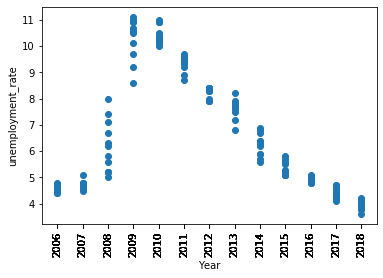

In [58]:
# Generate a scatter plot of year versus violent crime rate
years = unemployment_agedf.iloc[:,0]
unemployment_rate = unemployment_agedf.iloc[:,3]
plt.scatter(years,unemployment_rate)
plt.xticks(years,rotation= 90)
plt.xlabel('Year')
plt.ylabel('unemployment_rate')
plt.show()

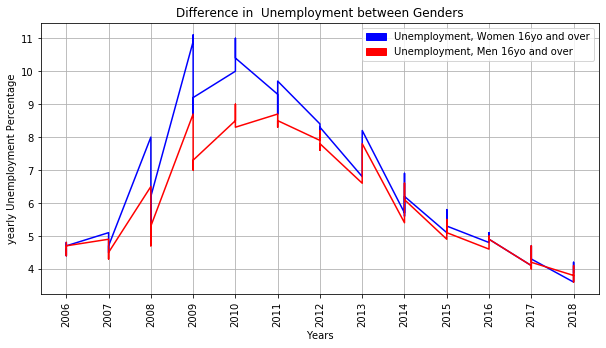

In [59]:
#unemployment between Genders
plt.figure(figsize=(10,5))
unemployment_men  = plt.plot(unemployment_agedf['years'], unemployment_agedf['Unemployment, Men 16yo and over'], color='blue')
unemployment_women = plt.plot(unemployment_agedf['years'], unemployment_agedf['Unemployment, Women 16yo and over'], color='red')

red_glabel = mpatches.Patch(color='red', label='Unemployment, Men 16yo and over')
blue_glabel = mpatches.Patch(color='blue', label='Unemployment, Women 16yo and over')

plt.legend(handles=[blue_glabel, red_glabel])
plt.title('Difference in  Unemployment between Genders')
plt.ylabel('yearly Unemployment Percentage')
plt.xlabel('Years')
plt.grid()
plt.xticks(unemployment_agedf['years'][::12], rotation='vertical')
plt.show()

Text(0.5, 1.0, 'Unemployment Between Races')

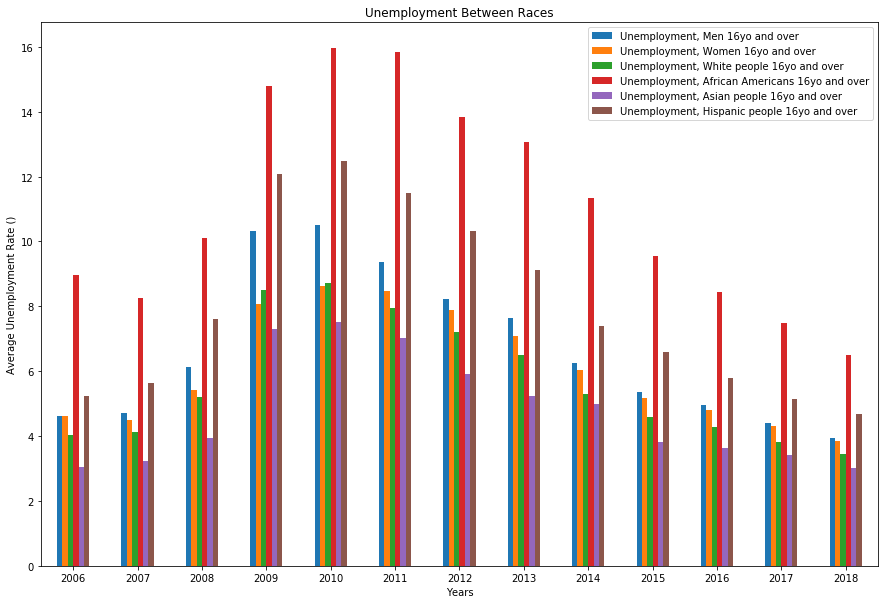

In [60]:
#Bar chart for unemployment
year_groupby.plot.bar(rot=0, figsize=(15, 10))
plt.xlabel("Years")
plt.ylabel("Average Unemployment Rate ()")
plt.title("Unemployment Between Races")

In [61]:
change_inunemployment_rate = unemployment_agedf.loc[unemployment_agedf["months"]== "January"]
change_inunemployment_rate.sort_values(['years'],inplace= True)
change_inunemployment_rate.head()

C:\Users\donkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,years,months,"Unemployment, 16yo and over","Unemployment, Men 16yo and over","Unemployment, Women 16yo and over","Unemployment, White people 16yo and over","Unemployment, African Americans 16yo and over","Unemployment, Asian people 16yo and over","Unemployment, Hispanic people 16yo and over"
0,2006,January,4.7,4.6,4.8,4.1,8.9,3.0,5.5
23,2007,January,4.6,4.7,4.5,4.2,7.9,3.1,5.5
29,2008,January,5.0,5.2,4.8,4.4,9.1,3.1,6.3
44,2009,January,7.8,8.6,7.0,7.1,12.7,6.1,10.1
58,2010,January,9.8,11.0,8.4,8.8,16.5,8.3,12.9


In [62]:
change_inunemployment_rate['Unemployment, 16yo and over'] = change_inunemployment_rate['Unemployment, 16yo and over'].astype('float64')

C:\Users\donkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
#change_inunemployment_rate = change_inunemployment_rate.drop(columns=["months", "years"])
#change_inunemployment_rate =df
#row_1 = change_inunemployment_rate.iloc[0]
#row_2 = change_inunemployment_rate.iloc[1]
#diff = row_2 - row_1
#print(diff)
#change_inunemployment_rate.head()

In [64]:

#for i in range((change_inunemployment_rate.shape[0]-1)):
    #row_1 = change_inunemployment_rate.iloc[i]
    #row_2 = change_inunemployment_rate.iloc[i+1]
    #diff = row_2 - row_1
#change_inunemployment_rate[i,] = diff
#change_inunemployment_rate.head()

In [65]:
# Create a list of the years that we will use as our x axis
#years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
#Unemployment_Men_16yo_and_over=[]
#Unemployment_Women_16yo_and_over=[]
# Plot our line that will be used to track 
#plt.plot(years, Unemployment_Men_16yo_and_over, color="green", label="Unemployment_Men_16yo_and_over")

# Plot our line that will be used to track 
#plt.plot(years, Unemployment_Women_16yo_and_over, color="blue", label="Unemployment_Women_16yo_and_over")

# Place a legend on the chart in what matplotlib believes to be the "best" location
#plt.legend(loc="best")

#plt.title(gender_name + "'s Recent Career")
##plt.xlabel("Years")
#plt.ylabel("Unemployment Men vs Women")

# Print our chart to the screen
#plt.show()

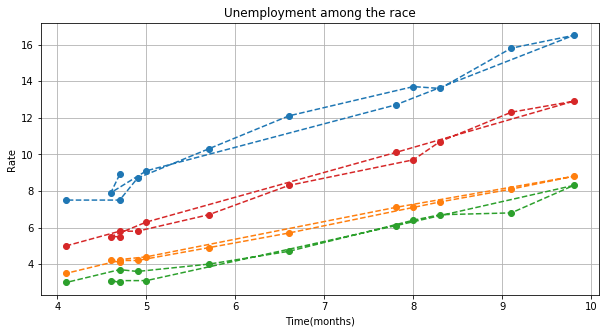

In [66]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10,5))

#fig
plt.errorbar(x=change_inunemployment_rate["Unemployment, 16yo and over"],y=change_inunemployment_rate["Unemployment, African Americans 16yo and over"], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=change_inunemployment_rate["Unemployment, 16yo and over"],y=change_inunemployment_rate["Unemployment, White people 16yo and over"], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=change_inunemployment_rate["Unemployment, 16yo and over"],y=change_inunemployment_rate["Unemployment, Asian people 16yo and over"], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=change_inunemployment_rate["Unemployment, 16yo and over"],y=change_inunemployment_rate["Unemployment, Hispanic people 16yo and over"], yerr=None, linestyle="--", fmt='o')

plt.ylabel('Rate')
plt.xlabel('Time(months)')
plt.title('Unemployment among the race')
plt.grid()
      
plt.show()